## LLM based image understanding 
#### Contributor(s): Utkarsh Pratiush <utkarshp1161@gmail.com> - 20th April 2025
#### edited - 
   

In [22]:
import sys

sys.path.append(
    "/nfs/home/upratius/scratch_i24/projects/pyAutoMic/TEM/stemOrchestrator/notebooks/atomGPT_related/AS-1.14/"
)
sys.path.append(
    "/nfs/home/upratius/scratch_i24/projects/pyAutoMic/TEM/stemOrchestrator/"
)

# 1. Using default model -  model_name: str = "gemini-2.0-flash-exp-image-generation"


In [23]:
import yaml
from stemOrchestrator.MLlayer.MLlayerLLM import generate_stem_analysis

import os

os.environ.pop("SSL_CERT_FILE", None)
os.environ.pop("SSL_CERT_DIR", None)


# Load the YAML file
with open("credential.yaml", "r") as f:
    cred = yaml.safe_load(f)

GEMINI_API_KEY = cred["GEMINI-API-KEY"]

In [17]:
# file_path = "/Users/utkarshpratiush/project/pyAutoMic/TEM/stemOrchestrator/data/drift_frame17.tiff"
# prompt = "This is a scanning transmission electron HAADF image of SrTiO3 sample. Guess the direction of view.. also return an image making a square on it to highlight the unit cell"

# response_text = generate_stem_analysis(file_path, prompt, api_key=GEMINI_API_KEY)
# print(response_text)


In [18]:
from pathlib import Path

file_path = "data/tries/0024-haadf.tif"
if not Path(file_path).exists():
    raise FileNotFoundError(f"Image not found at: {file_path}")

response_text = generate_stem_analysis(
    file_path,
    "This is STEM image of Al-Cu-Zr alloy, please describe what you see",
    api_key=GEMINI_API_KEY,
)
print(response_text)

2025-10-15 16:36:16,356 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/upload/v1beta/files "HTTP/1.1 200 OK"
2025-10-15 16:36:17,105 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/upload/v1beta/files?upload_id=AAwnv3Lv6iXV0Uz47SCPZ4jjr-xln0rQHelOQxqFMwxJeSqNWYCKzw1RwKqazp6LRidnUUkMX_n1fnj7mSWBIONeNlWb4FDLZsbCejAr8WQEwg&upload_protocol=resumable "HTTP/1.1 200 OK"
2025-10-15 16:36:19,008 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/upload/v1beta/files?upload_id=AAwnv3Lv6iXV0Uz47SCPZ4jjr-xln0rQHelOQxqFMwxJeSqNWYCKzw1RwKqazp6LRidnUUkMX_n1fnj7mSWBIONeNlWb4FDLZsbCejAr8WQEwg&upload_protocol=resumable "HTTP/1.1 200 OK"
2025-10-15 16:36:19,009 - INFO - AFC is enabled with max remote calls: 10.
2025-10-15 16:36:25,460 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash-exp-image-generation:generateContent "HTTP/1.1 200 OK"
Here's a description of what I see in the STEM image of

In [ ]:
response_text = generate_stem_analysis(
    file_path,
    "This is STEM image of Al-Cu-Zr alloy, please describe what you see. We have an hypothesis that Zr blobs are sphere or disc? what eveidence you see and what you suggest?",
    api_key=GEMINI_API_KEY,
)
print(response_text)

2025-10-15 16:53:35,407 - INFO - AFC is enabled with max remote calls: 10.
2025-10-15 16:53:36,384 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash-exp-image-generation:generateContent "HTTP/1.1 200 OK"
2025-10-15 16:53:36,718 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/upload/v1beta/files "HTTP/1.1 200 OK"
2025-10-15 16:53:37,286 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/upload/v1beta/files?upload_id=AAwnv3K6xWLMx2RFyXmRIxqmaWIss9eH-IHSQawU2OWArC1muN70QjxM88SUvWk5KHluigiUSdBs0-mGE46fvPpLRcJe2KvMUj22QnJMhMpdEA&upload_protocol=resumable "HTTP/1.1 200 OK"
2025-10-15 16:53:38,659 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/upload/v1beta/files?upload_id=AAwnv3K6xWLMx2RFyXmRIxqmaWIss9eH-IHSQawU2OWArC1muN70QjxM88SUvWk5KHluigiUSdBs0-mGE46fvPpLRcJe2KvMUj22QnJMhMpdEA&upload_protocol=resumable "HTTP/1.1 200 OK"
2025-10-15 16:53:38,660 - INFO - AFC is enabled with ma

In [12]:
from stemOrchestrator.acquisition import TFacquisition, DMacquisition
from stemOrchestrator.simulation import DMtwin
from stemOrchestrator.process import HAADF_tiff_to_png, tiff_to_png
from autoscript_tem_microscope_client import TemMicroscopeClient
import matplotlib.pyplot as plt
import logging

plot = plt
from typing import Dict

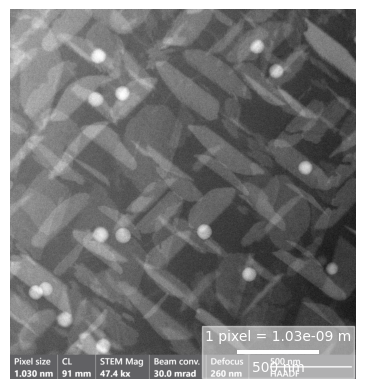

In [13]:
HAADF_tiff_to_png(file_path)

# 2. trying other models with same query


The following **Gemini models** can be used with a multimodal `generate_content` query that includes **text and an image**, similar to your provided code:

* **`gemini-2.5-flash`** (The model you're currently using)
* **`gemini-2.5-pro`**
* **`gemini-2.5-flash-lite`**
* **`gemini-2.5-flash-image`** (Specialized for image-based workflows, including image generation and editing, but also supports understanding image inputs)
* **Older Gemini 2.0 models** (e.g., `gemini-2.0-flash`, `gemini-2.0-flash-lite`)

***

## Key Multimodal Models 🖼️

The Gemini models listed below are known for their multimodal capabilities and can accept images (as well as other modalities like audio and video) along with text input for the `generate_content` API call.

| Model ID | Primary Use Case/Trait |
| :--- | :--- |
| **`gemini-2.5-pro`** | Most powerful for complex reasoning and highly sophisticated tasks. |
| **`gemini-2.5-flash`** | Great balance of speed and quality; excellent for general, everyday multimodal tasks (like the one you're running). |
| **`gemini-2.5-flash-lite`** | Most cost-effective and fastest model in the 2.5 line for high-volume tasks. |
| **`gemini-2.5-flash-image`** | Optimized for image understanding, generation, and conversational image editing. |

Since you are already successfully using **`gemini-2.5-flash`**, that confirms it supports the text and image input you provided. You'd typically choose between these models based on a tradeoff between **cost**, **speed**, and the **complexity** of the task.

# 2a. gemini-2.5-pro

In [17]:
from pathlib import Path

file_path = "data/tries/0024-haadf.tif"
if not Path(file_path).exists():
    raise FileNotFoundError(f"Image not found at: {file_path}")

# model_name="gemini-2.5-pro"
# model_name="gemini-2.5-flash"
model_name = "gemini-2.0-flash-exp-image-generation"
# model_name = "gemini-2.5-flash-image"
response_text = generate_stem_analysis(
    file_path,
    prompt="This is STEM image of Al-Cu-Zr alloy, please describe what you see",
    model_name=model_name,
    api_key=GEMINI_API_KEY,
)
print(response_text)

2025-10-15 17:26:52,630 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/upload/v1beta/files "HTTP/1.1 200 OK"
2025-10-15 17:26:52,920 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/upload/v1beta/files?upload_id=AAwnv3Iql32fvMXQ3CHDanGVvUsUwbk9TfzT3zhhIqQra1hRNzOledo5yh9tOaMkI3Oq4eCWuTtN_lV0ETC7hRjOO7jSLJ-nA3qsRCq1Bac9Fvs&upload_protocol=resumable "HTTP/1.1 200 OK"
2025-10-15 17:26:54,222 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/upload/v1beta/files?upload_id=AAwnv3Iql32fvMXQ3CHDanGVvUsUwbk9TfzT3zhhIqQra1hRNzOledo5yh9tOaMkI3Oq4eCWuTtN_lV0ETC7hRjOO7jSLJ-nA3qsRCq1Bac9Fvs&upload_protocol=resumable "HTTP/1.1 200 OK"
2025-10-15 17:26:54,223 - INFO - AFC is enabled with max remote calls: 10.
2025-10-15 17:26:59,716 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash-exp-image-generation:generateContent "HTTP/1.1 200 OK"
Here's a description of what I observe in the STEM im

# 3. try sciLink

In [25]:
#
import scilink

FH_KEY = cred["FH-KEY"]
# Configure required API keys
scilink.configure("google", GEMINI_API_KEY)
scilink.configure("futurehouse", FH_KEY)  # Optional

# You can also set them as environment variables:
# export GOOGLE_API_KEY="your-key"
# export FUTUREHOUSE_API_KEY="your-key"

In [28]:
from scilink.workflows import ExperimentNoveltyAssessment

# Create the workflow for microscopy data
# The agent_id will be chosen automatically by the OrchestratorAgent
workflow = ExperimentNoveltyAssessment(
    data_type="microscopy", output_dir="novelty_analysis"
)

# Run the complete analysis
result = workflow.run_complete_workflow(
    data_path=file_path,
    analysis_model="gemini-2.0-flash-exp-image-generation",
    system_info={"material": "Al-Cu with Zr", "technique": "HAADF-STEM"},
)

print(f"Workflow Status: {result['final_status']}")
if result["final_status"] == "success":
    print(
        f"Average Novelty Score: {result['novelty_assessment']['average_novelty_score']:.2f}/5.0"
    )
    print(
        f"Potentially Novel Findings: {len(result['novelty_assessment']['potentially_novel'])}"
    )

2025-10-15 17:46:31,719 - WARNING: root: Unused arguments passed to MicroscopyAnalyzer: {'futurehouse_api_key': 'qVSe1THgi2W18UpJjW7yKQ.platformv01.eyJqdGkiOiJiYmZjNGViNy04ZTFlLTQxZGEtOWE3OC1kZDM3ZTYxOWMyMWEiLCJzdWIiOiJjNzQzdmRwcThZVTVqeVBuNlVsT3J2Z0p4QmIyIiwiaWF0IjoxNzYwNTY0NDAzfQ.eLESNaLeI3zc6sR4l5FPtxRdjdY5jfMeS9aYVwXThtQ'}
2025-10-15 17:46:32,416 - INFO: root: OWLLiteratureAgent initialized with max wait time of 1000 seconds.

🔬 Experiment Novelty Assessment Starting
📊 Data Type: Microscopy
📁 Data File: 0024-haadf.tif
📂 Output:   novelty_analysis/

🔍 WORKFLOW STEP 1: Microscopy Analysis
──────────────────────────────────────────────────
🔨 Analyzing microscopy data...
    (Agent logs will appear below)
──────────────────────────────
2025-10-15 17:46:32,417 - INFO: root: Using orchestrator to select the best analysis agent...
2025-10-15 17:46:32,417 - INFO: root: ☁️ Using cloud agent as the orchestrator.
2025-10-15 17:46:32,417 - INFO: scilink.agents.exp_agents.orchestrator_agent: Or

E0000 00:00:1760564792.436023 1990091 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


2025-10-15 17:46:37,478 - INFO: scilink.agents.exp_agents.orchestrator_agent: 

🧠 Orchestrator Reasoning: The image clearly shows numerous distinct, countable features, including bright spherical particles and elongated precipitates within a matrix. Individual atoms are not resolved. The `SAMMicroscopyAnalysisAgent` (ID 1) is explicitly designed for images containing large, distinct, countable objects, making it ideal for measuring properties such as size, shape, and spatial arrangement of these features.

2025-10-15 17:46:37,479 - INFO: root: ✅ Running analysis with: SAMMicroscopyAnalysisAgent
2025-10-15 17:46:37,479 - INFO: root: ☁️ Using cloud agent as the analysis agent.
──────────────────────────────
❌ Microscopy analysis failed: Analysis failed: SAMMicroscopyAnalysisAgent.analyze_for_claims() got an unexpected keyword argument 'analysis_model'
Workflow Status: failed_analysis


# 4. Try more models - Open-router

In [6]:
import yaml
import os

# Load the YAML file
with open("credential.yaml", "r") as f:
    cred = yaml.safe_load(f)

# Set the OpenRouter API key as an environment variable
os.environ["OPENROUTER_API_KEY"] = cred["OPENROUTER_API_KEY"]

In [7]:
import os
import base64
import argparse
from openai import OpenAI
from openai import OpenAIError


class OpenRouterImageModel:
    """
    A class to interact with OpenRouter API for image analysis using
    various vision-capable models.
    """

    # Define simple keys (aliases) for the models.
    # This dictionary maps the simple key to the full model name.
    MODEL_ALIASES = {
        "gemma-4b": "google/gemma-3-4b-it:free",
        "gemma-12b": "google/gemma-3-12b-it:free",
        "gemma-27b": "google/gemma-3-27b-it:free",
        "llama-vision": "meta-llama/llama-3.2-11b-vision-instruct:free",
        "mistral-small": "mistralai/mistral-small-3.1-24b-instruct:free",
        "kimi-vl": "moonshotai/kimi-vl-a3b-thinking:free",
        "qwen-32b-vl": "qwen/qwen2.5-vl-32b-instruct:free",
        "qwen-72b-vl": "qwen/qwen2.5-vl-72b-instruct:free",
    }

    def __init__(self, model_key: str = "qwen-32b-vl"):
        """
        Initializes the OpenRouterImageModel with a specified model key.
        The API key is exclusively read from the OPENROUTER_API_KEY
        environment variable.

        Args:
            model_key (str, optional): The simple key for the model to use for analysis.
                                       Must be one of the keys in MODEL_ALIASES.
        Raises:
            ValueError: If the API key environment variable is not set, or if the
                        model key is not valid.
        """
        api_key = os.getenv("OPENROUTER_API_KEY")
        if not api_key:
            raise ValueError(
                "OpenRouter API key not found. Please set the OPENROUTER_API_KEY "
                "environment variable."
            )

        if model_key not in self.MODEL_ALIASES:
            raise ValueError(
                f"Model key '{model_key}' is not a valid alias. "
                f"Valid aliases are: {', '.join(self.MODEL_ALIASES.keys())}"
            )

        self.client = OpenAI(base_url="https://openrouter.ai/api/v1", api_key=api_key)
        # Store the full model name corresponding to the provided key
        self.model_full_name = self.MODEL_ALIASES[model_key]
        print("OpenRouterImageModel initialized.")

    def set_model(self, model_key: str):
        """
        Sets the  model for the OpenRouterImageModel instance.
        This allows you to change the model used for subsequent analyze_image calls.

        Args:
            model_key (str): The simple key for the model to set as default.
                             Must be one of the keys in MODEL_ALIASES.

        Raises:
            ValueError: If the provided model_key is not a valid alias.
        """
        if model_key not in self.MODEL_ALIASES:
            raise ValueError(
                f"Model key '{model_key}' is not a valid alias. "
                f"Valid aliases are: {', '.join(self.MODEL_ALIASES.keys())}"
            )
        self.model_full_name = self.MODEL_ALIASES[model_key]
        print(f"Default model set to: {self.model_full_name} (key: {model_key})")

    def _encode_image_to_base64(self, image_path: str) -> tuple[str | None, str | None]:
        """
        Encodes a local image file to a base64 string and determines its MIME type.
        This is a private helper method.

        Args:
            image_path (str): The path to the local image file.

        Returns:
            tuple: A tuple containing the base64 encoded string and the MIME type,
                   or (None, None) if the file does not exist or cannot be read.
        """
        if not os.path.exists(image_path):
            print(f"Error: Image file not found at {image_path}")
            return None, None

        try:
            with open(image_path, "rb") as image_file:
                encoded_string = base64.b64encode(image_file.read()).decode("utf-8")

            # Determine the MIME type based on the file extension
            file_extension = os.path.splitext(image_path)[1].lower()
            if file_extension in [".jpg", ".jpeg"]:
                mime_type = "image/jpeg"
            elif file_extension == ".png":
                mime_type = "image/png"
            elif file_extension == ".gif":
                mime_type = "image/gif"
            elif file_extension == ".webp":
                mime_type = "image/webp"
            else:
                print(
                    f"Warning: Unsupported image format '{file_extension}' for {image_path}. Defaulting to image/jpeg."
                )
                mime_type = "image/jpeg"  # Default or handle other types as needed

            return encoded_string, mime_type
        except Exception as e:
            print(f"Error encoding image {image_path}: {e}")
            return None, None

    def analyze_image(self, image_path: str, prompt: str) -> str | None:
        """
        Analyzes a local image using the currently set OpenRouter model
        with a user-provided prompt.

        Args:
            image_path (str): The path to the local image file to be analyzed.
            prompt (str): The text prompt to send along with the image for analysis.

        Returns:
            str | None: The content of the model's response if successful,
                        otherwise None.
        """
        # The model to use is now always the model_full_name set in __init__
        # or updated via set_model().
        selected_model_full_name = self.model_full_name

        encoded_image, mime_type = self._encode_image_to_base64(image_path)

        if not (encoded_image and mime_type):
            print("Image encoding failed. Cannot proceed with analysis.")
            return None

        # Construct the image_url with the base64 data URI
        image_data_uri = f"data:{mime_type};base64,{encoded_image}"

        # Print the key associated with the current model for clarity
        current_model_key = next(
            (
                key
                for key, value in self.MODEL_ALIASES.items()
                if value == selected_model_full_name
            ),
            "unknown",
        )
        print(f"Using model: {selected_model_full_name} (key: {current_model_key})")
        print(f"Analyzing image: {image_path}")
        print(f"Using prompt: '{prompt}'")

        try:
            completion = self.client.chat.completions.create(
                model=selected_model_full_name,  # Use the resolved full model name here
                messages=[
                    {
                        "role": "user",
                        "content": [
                            {"type": "text", "text": prompt},
                            {"type": "image_url", "image_url": {"url": image_data_uri}},
                        ],
                    }
                ],
            )
            return completion.choices[0].message.content
        except OpenAIError as e:
            print(f"OpenAI API error during image analysis: {e}")
            return None
        except Exception as e:
            print(f"An unexpected error occurred during image analysis: {e}")
            return None


def parse_command_line_args():
    """
    Parses command-line arguments for model selection, image path, and prompt.

    Returns:
        argparse.Namespace: An object containing the parsed arguments.
    """
    parser = argparse.ArgumentParser(
        description="Analyze an image using an OpenAI-compatible API (OpenRouter) with a selectable model alias and custom prompt."
    )
    parser.add_argument(
        "-m",
        "--model",  # Added '-m' as a short alias
        type=str,
        choices=OpenRouterImageModel.MODEL_ALIASES.keys(),
        default="qwen-32b-vl",
        help=f"Select the model to use for image analysis using its simple key. Available choices: {', '.join(OpenRouterImageModel.MODEL_ALIASES.keys())}",
    )
    parser.add_argument(
        "-i",
        "--image_path",  # Added '-i' as a short alias
        type=str,
        required=True,
        help="Path to the local image file to be analyzed.",
    )
    parser.add_argument(
        "-p",
        "--prompt",  # Added '-p' as a short alias
        type=str,
        default="What is in this image?",  # Default prompt if not specified
        help="The text prompt to send along with the image for analysis.",
    )

    # Parse the arguments from the command line
    args = parser.parse_args()
    return args

In [8]:
MODEL_ALIASES = {
    "gemma-4b": "google/gemma-3-4b-it:free",
    "gemma-12b": "google/gemma-3-12b-it:free",
    "gemma-27b": "google/gemma-3-27b-it:free",
    "llama-vision": "meta-llama/llama-3.2-11b-vision-instruct:free",
    "mistral-small": "mistralai/mistral-small-3.1-24b-instruct:free",
    "kimi-vl": "moonshotai/kimi-vl-a3b-thinking:free",
    "qwen-32b-vl": "qwen/qwen2.5-vl-32b-instruct:free",
    "qwen-72b-vl": "qwen/qwen2.5-vl-72b-instruct:free",
}

In [15]:
# Instantiate the class with the model key from argparse
image_analyzer = OpenRouterImageModel(model_key="gemma-4b")
file_path = "data/tries/0024-haadf.tif"
prompt = "This is STEM image of Al-Cu-Zr alloy, please describe what you see"
response = image_analyzer.analyze_image(file_path, prompt)
response

OpenRouterImageModel initialized.
Using model: google/gemma-3-4b-it:free (key: gemma-4b)
Analyzing image: data/tries/0024-haadf.tif
Using prompt: 'This is STEM image of Al-Cu-Zr alloy, please describe what you see'


"Okay, let's break down what we're seeing in this STEM (Scanning Transmission Electron Microscopy) image of an Al-Cu-Zr alloy. Here's a detailed description based on the visual information and the provided metadata:\n\n**Overall Impression:**\n\nThe image shows a highly heterogeneous microstructure of an Al-Cu-Zr alloy. It’s a complex, granular structure with a significant amount of dispersed secondary phases. The image was acquired using High-Angle Annular Dark Field (HAADF) imaging, which means the brightness of the image is related to the atomic number (Z) of the elements present.  Heavier elements appear brighter.\n\n**Key Features:**\n\n1. **Grain Structure:** The dominant feature is a network of relatively large, irregular grains. These appear to be the primary matrix of the alloy. They have a somewhat amorphous or poorly defined shape.\n\n2. **Secondary Phases (Dispersed Particles):** This is the most striking aspect of the image. There are numerous bright, spherical or roughly 

In [16]:
# Instantiate the class with the model key from argparse
image_analyzer = OpenRouterImageModel(model_key="gemma-12b")
file_path = "data/tries/0024-haadf.tif"
prompt = "This is STEM image of Al-Cu-Zr alloy, please describe what you see"
response = image_analyzer.analyze_image(file_path, prompt)
response

OpenRouterImageModel initialized.
Using model: google/gemma-3-12b-it:free (key: gemma-12b)
Analyzing image: data/tries/0024-haadf.tif
Using prompt: 'This is STEM image of Al-Cu-Zr alloy, please describe what you see'


"Okay, let's break down what we see in this STEM (Scanning Transmission Electron Microscopy) image of an Al-Cu-Zr alloy.\n\n**Overall Impression:**\n\nThe image shows a high-resolution microstructure of the alloy. It appears to be a relatively fine-grained material with a distinct, ordered structure. The contrast is primarily due to differences in electron scattering, which is characteristic of HAADF (High-Angle Annular Dark-Field) imaging.\n\n**Key Features and Interpretation:**\n\n1.  **Ordered Phase (L1₂):** The most striking feature is the presence of numerous elongated, plate-like regions. These are strongly indicative of an ordered phase, specifically the L1₂ phase. This phase is commonly observed in Al-Cu-Zr alloys and is formed by the ordered arrangement of Aluminum, Copper, and Zirconium atoms. The elongated shape suggests a preferred orientation of these ordered domains within the material. The contrast within these regions is complex, likely due to variations in composition 

In [17]:
# Instantiate the class with the model key from argparse
image_analyzer = OpenRouterImageModel(model_key="gemma-27b")
file_path = "data/tries/0024-haadf.tif"
prompt = "This is STEM image of Al-Cu-Zr alloy, please describe what you see"
response = image_analyzer.analyze_image(file_path, prompt)
response

OpenRouterImageModel initialized.
Using model: google/gemma-3-27b-it:free (key: gemma-27b)
Analyzing image: data/tries/0024-haadf.tif
Using prompt: 'This is STEM image of Al-Cu-Zr alloy, please describe what you see'


'Okay, let\'s break down what we\'re seeing in this STEM (Scanning Transmission Electron Microscopy) image of an Al-Cu-Zr alloy.  Based on the image and the information provided (HAADF mode), here\'s a detailed description:\n\n**1. Imaging Mode: HAADF-STEM**\n\n*   **HAADF** stands for High-Angle Annular Dark-Field. This is a crucial piece of information. In HAADF-STEM, contrast is primarily related to the *atomic number* (Z) of the elements present.  Heavier elements scatter electrons more strongly and appear brighter, while lighter elements appear darker. This is why it\'s sometimes called "Z-contrast" imaging.\n\n**2. Microstructure**\n\n*   **Precipitates:** The most striking feature is the presence of numerous, relatively round, bright particles distributed within a darker matrix. These are precipitates.  Given the alloy composition (Al-Cu-Zr), these precipitates are likely intermetallic compounds formed from the combination of Cu and Zr.  The brightness suggests they are richer i

In [18]:
# Instantiate the class with the model key from argparse
image_analyzer = OpenRouterImageModel(model_key="llama-vision")
file_path = "data/tries/0024-haadf.tif"
prompt = "This is STEM image of Al-Cu-Zr alloy, please describe what you see"
response = image_analyzer.analyze_image(file_path, prompt)
response

OpenRouterImageModel initialized.
Using model: meta-llama/llama-3.2-11b-vision-instruct:free (key: llama-vision)
Analyzing image: data/tries/0024-haadf.tif
Using prompt: 'This is STEM image of Al-Cu-Zr alloy, please describe what you see'
OpenAI API error during image analysis: Error code: 404 - {'error': {'message': 'No endpoints found for meta-llama/llama-3.2-11b-vision-instruct:free.', 'code': 404}, 'user_id': 'user_2cCmN6FiVycoO3DCWMp0SWR9avP'}


In [19]:
# Instantiate the class with the model key from argparse
image_analyzer = OpenRouterImageModel(model_key="mistral-small")
file_path = "data/tries/0024-haadf.tif"
prompt = "This is STEM image of Al-Cu-Zr alloy, please describe what you see"
response = image_analyzer.analyze_image(file_path, prompt)
response

OpenRouterImageModel initialized.
Using model: mistralai/mistral-small-3.1-24b-instruct:free (key: mistral-small)
Analyzing image: data/tries/0024-haadf.tif
Using prompt: 'This is STEM image of Al-Cu-Zr alloy, please describe what you see'


'This is a Scanning Transmission Electron Microscope (STEM) image of an Al-Cu-Zr alloy, captured using High-Angle Annular Dark Field (HAADF) imaging. Here are some key observations and details from the image:\n\n1. **Bright Spots**: The bright spots in the image likely represent atomic columns of heavier elements (such as Cu and Zr) due to the Z-contrast nature of HAADF imaging, where heavier elements appear brighter.\n\n2. **Crystal Structure**: The periodic arrangement of these bright spots suggests a crystalline structure. The pattern appears to be consistent with an intermetallic phase commonly found in Al-Cu-Zr alloys.\n\n3. **Magnification and Scale**: The image is taken at a high magnification of 47.4 kx, with a pixel size of 1.030 nm. The scale bar at the bottom right indicates that the field of view is 500 nm wide.\n\n4. **Defocus and Beam Convergence**: The defocus value is 260 nm, and the beam convergence is 30.0 mrad, which are parameters used to optimize the imaging condit

In [20]:
# Instantiate the class with the model key from argparse
image_analyzer = OpenRouterImageModel(model_key="kimi-vl")
file_path = "data/tries/0024-haadf.tif"
prompt = "This is STEM image of Al-Cu-Zr alloy, please describe what you see"
response = image_analyzer.analyze_image(file_path, prompt)
response

OpenRouterImageModel initialized.
Using model: moonshotai/kimi-vl-a3b-thinking:free (key: kimi-vl)
Analyzing image: data/tries/0024-haadf.tif
Using prompt: 'This is STEM image of Al-Cu-Zr alloy, please describe what you see'
OpenAI API error during image analysis: Error code: 404 - {'error': {'message': 'No endpoints found for moonshotai/kimi-vl-a3b-thinking:free.', 'code': 404}, 'user_id': 'user_2cCmN6FiVycoO3DCWMp0SWR9avP'}


In [21]:
# Instantiate the class with the model key from argparse
image_analyzer = OpenRouterImageModel(model_key="qwen-32b-vl")
file_path = "data/tries/0024-haadf.tif"
prompt = "This is STEM image of Al-Cu-Zr alloy, please describe what you see"
response = image_analyzer.analyze_image(file_path, prompt)
response

OpenRouterImageModel initialized.
Using model: qwen/qwen2.5-vl-32b-instruct:free (key: qwen-32b-vl)
Analyzing image: data/tries/0024-haadf.tif
Using prompt: 'This is STEM image of Al-Cu-Zr alloy, please describe what you see'
An unexpected error occurred during image analysis: 'NoneType' object is not subscriptable


In [22]:
# Instantiate the class with the model key from argparse
image_analyzer = OpenRouterImageModel(model_key="qwen-72b-vl")
file_path = "data/tries/0024-haadf.tif"
prompt = "This is STEM image of Al-Cu-Zr alloy, please describe what you see"
response = image_analyzer.analyze_image(file_path, prompt)
response

OpenRouterImageModel initialized.
Using model: qwen/qwen2.5-vl-72b-instruct:free (key: qwen-72b-vl)
Analyzing image: data/tries/0024-haadf.tif
Using prompt: 'This is STEM image of Al-Cu-Zr alloy, please describe what you see'
OpenAI API error during image analysis: Error code: 400 - {'error': {'message': 'Provider returned error', 'code': 400, 'metadata': {'raw': '{"error":{"message":"Exceeded limit on max bytes per data-uri item : 10485760","type":"invalid_request_error","param":null,"code":null},"request_id":"52a41cce-1f79-90ab-9e61-4f3eb37b9d1a"}', 'provider_name': 'Alibaba'}}, 'user_id': 'user_2cCmN6FiVycoO3DCWMp0SWR9avP'}
